## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how = 'outer')
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
mean = df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
standard_deviation = df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM = df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                                 "Standard Deviation": standard_deviation, "SEM": SEM})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

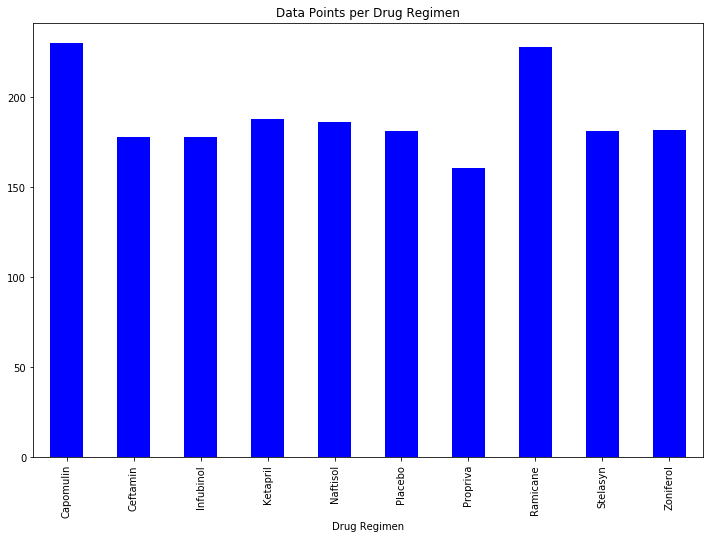

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

data_points = df.groupby(['Drug Regimen']).count()['Mouse ID']

data_points.plot(kind="bar", figsize=(12,8), color = "b", legend=False)

plt.title("Data Points per Drug Regimen")
plt.show()

Text(0.5, 0, 'Drug Regimen')

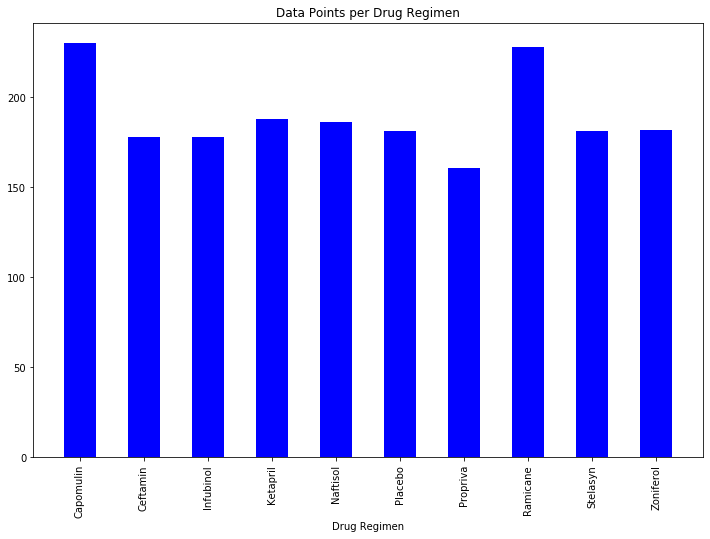

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

names = ['Capomulin', 'Ceftamin', 'Infubinol' , 'Ketapril' , 'Naftisol' , 'Placebo' , 'Propriva' , 'Ramicane' , 'Stelasyn' , 'Zoniferol']
values = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

plt.figure(figsize=(12, 8))
plt.bar(names, values, color = "b" , width = .5 )
plt.xticks(rotation = "vertical")
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")

## Pie plots

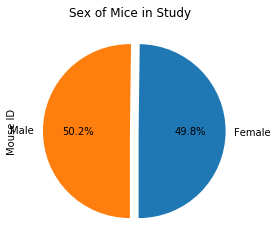

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = df.groupby(['Sex']).nunique()['Mouse ID']
sex.plot(kind="pie", labels=sex.index.values, autopct="%1.1f%%", startangle = 270, subplots=True, explode=explode)
plt.title("Sex of Mice in Study")
plt.show()


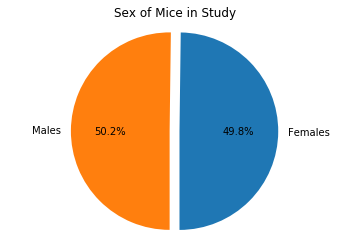

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Females', 'Males'
explode = (0.1, 0)
sizes = [124, 125]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=270)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sex of Mice in Study")
plt.show()

## Quartiles, outliers and boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of
# the most promising treatment regimens. Calculate the IQR and 
# quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen